In [20]:
import pandas as pd
import numpy as np
import glob
import re
import collections
import matplotlib.pyplot as plt

# Load Data

In [2]:
rider_names = list(pd.read_csv('../data/pcs-scraping/rider_names.csv'))

In [3]:
rider_name = rider_names[0]

path = f'../data/pcs-scraping/results/rider/{rider_name}'

In [4]:
df_rider_clean = {rider_name: {}}

for file in glob.glob(f'{path}/*_clean.csv'):

    year = re.search('\d{4}', file).group(0)
    df_rider_clean[rider_name][year] = pd.read_csv(file)

# Visualizations

### Plot Season Race Results

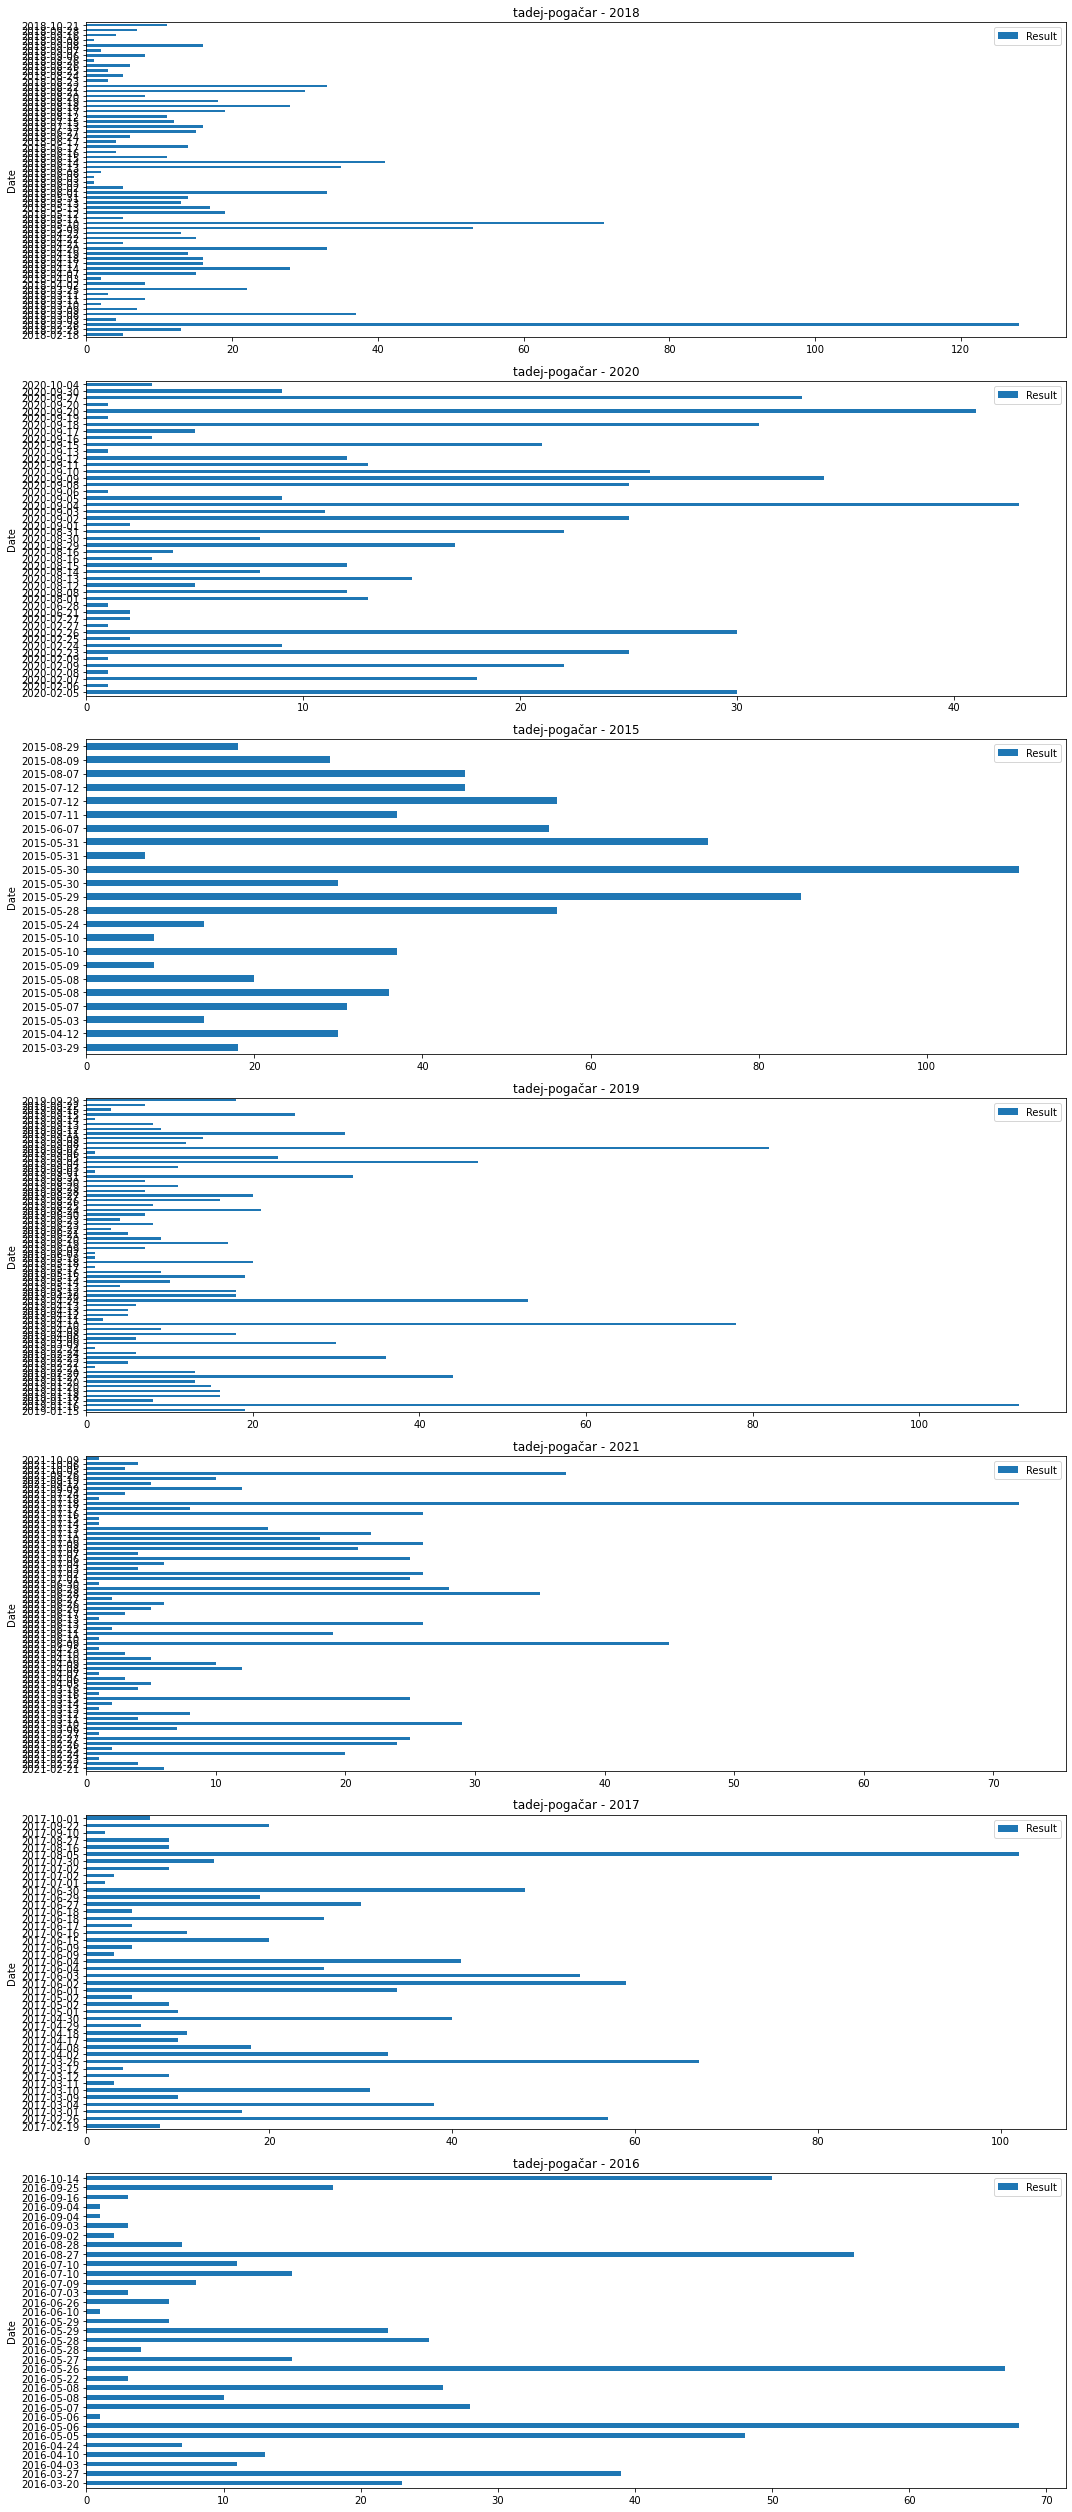

In [7]:
fig, axs = plt.subplots(len(df_rider_clean[rider_name]), figsize=(15,35))

for year, ax in zip(df_rider_clean[rider_name].keys(), axs):
    
    df_rider_clean[rider_name][year].plot(kind='barh', x='Date', y='Result', ax=ax)
    
    ax.set_title(f'{rider_name} - {year}')
    #ax.invert_xaxis()
    plt.tight_layout()

plt.show()

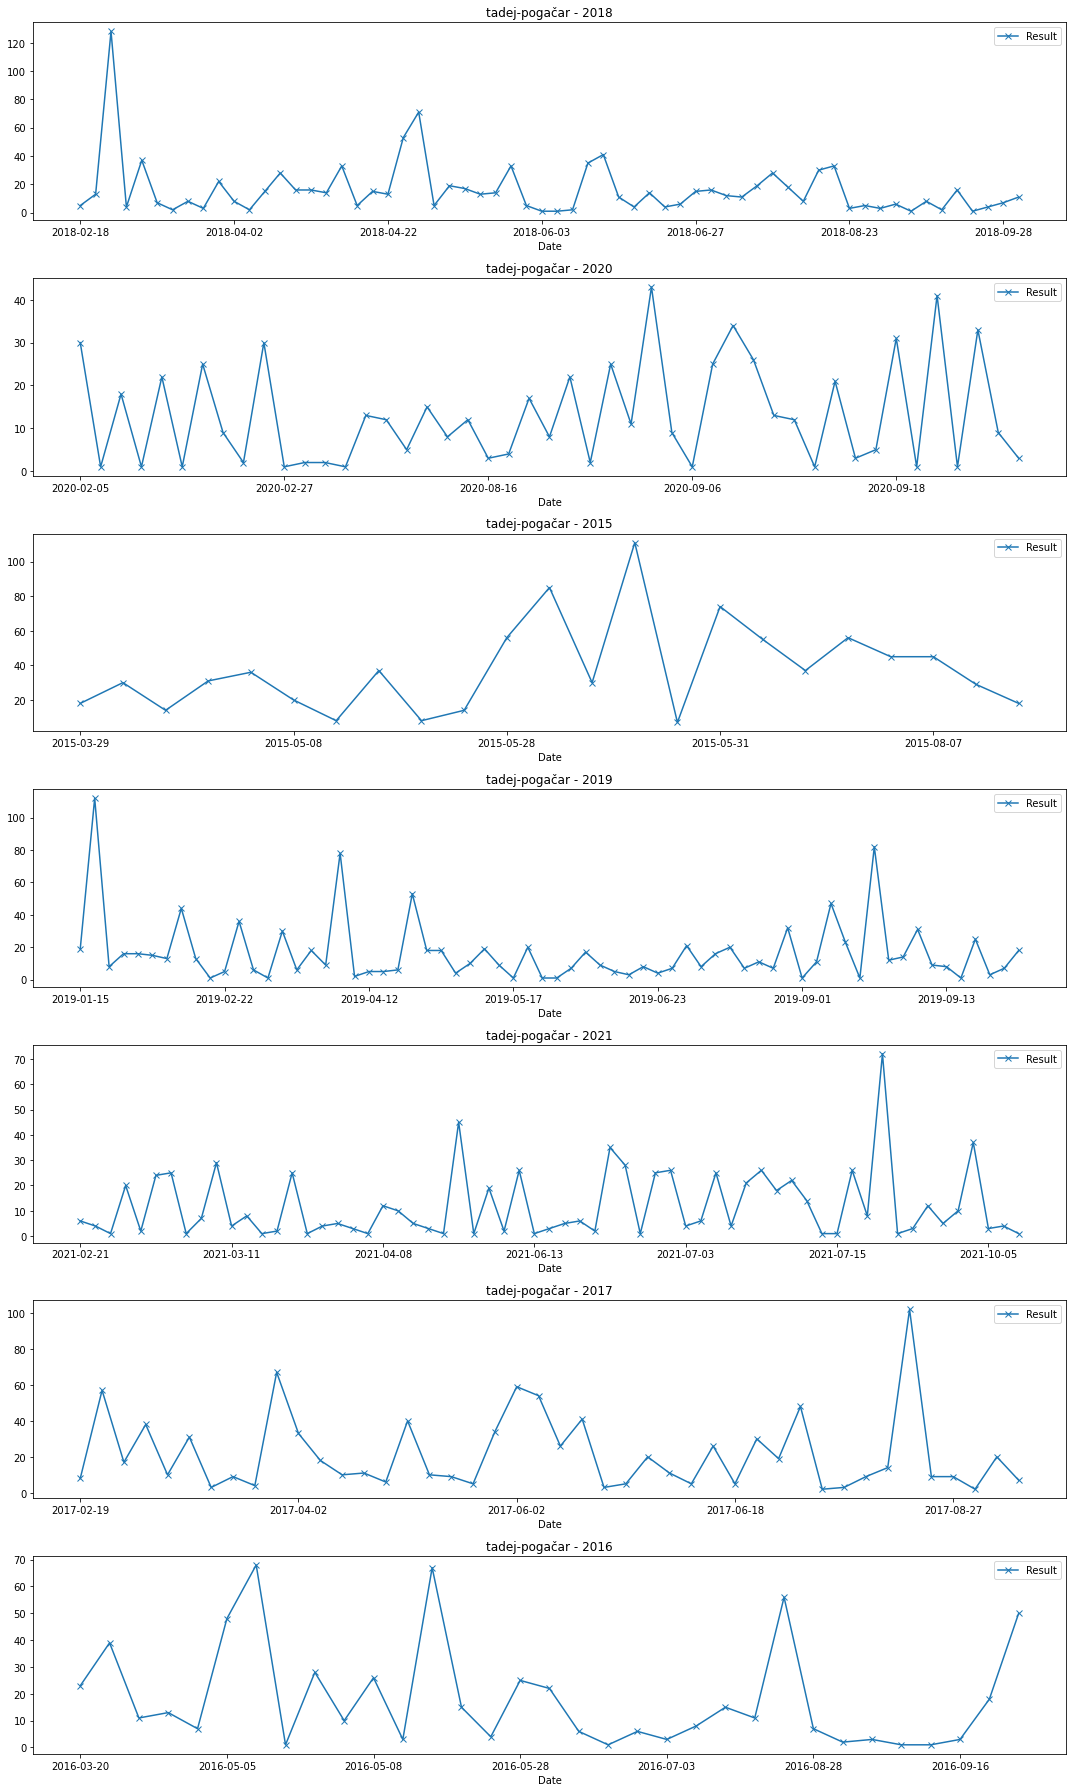

In [8]:
fig, axs = plt.subplots(len(df_rider_clean[rider_name]), figsize=(15,25))

for year, ax in zip(df_rider_clean[rider_name].keys(), axs):
    
    df_rider_clean[rider_name][year].plot(kind='line', marker='x', x='Date', y='Result', ax=ax)
    
    ax.set_title(f'{rider_name} - {year}')
    #ax.invert_yaxis()
    plt.tight_layout()

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 141 missing from current font.

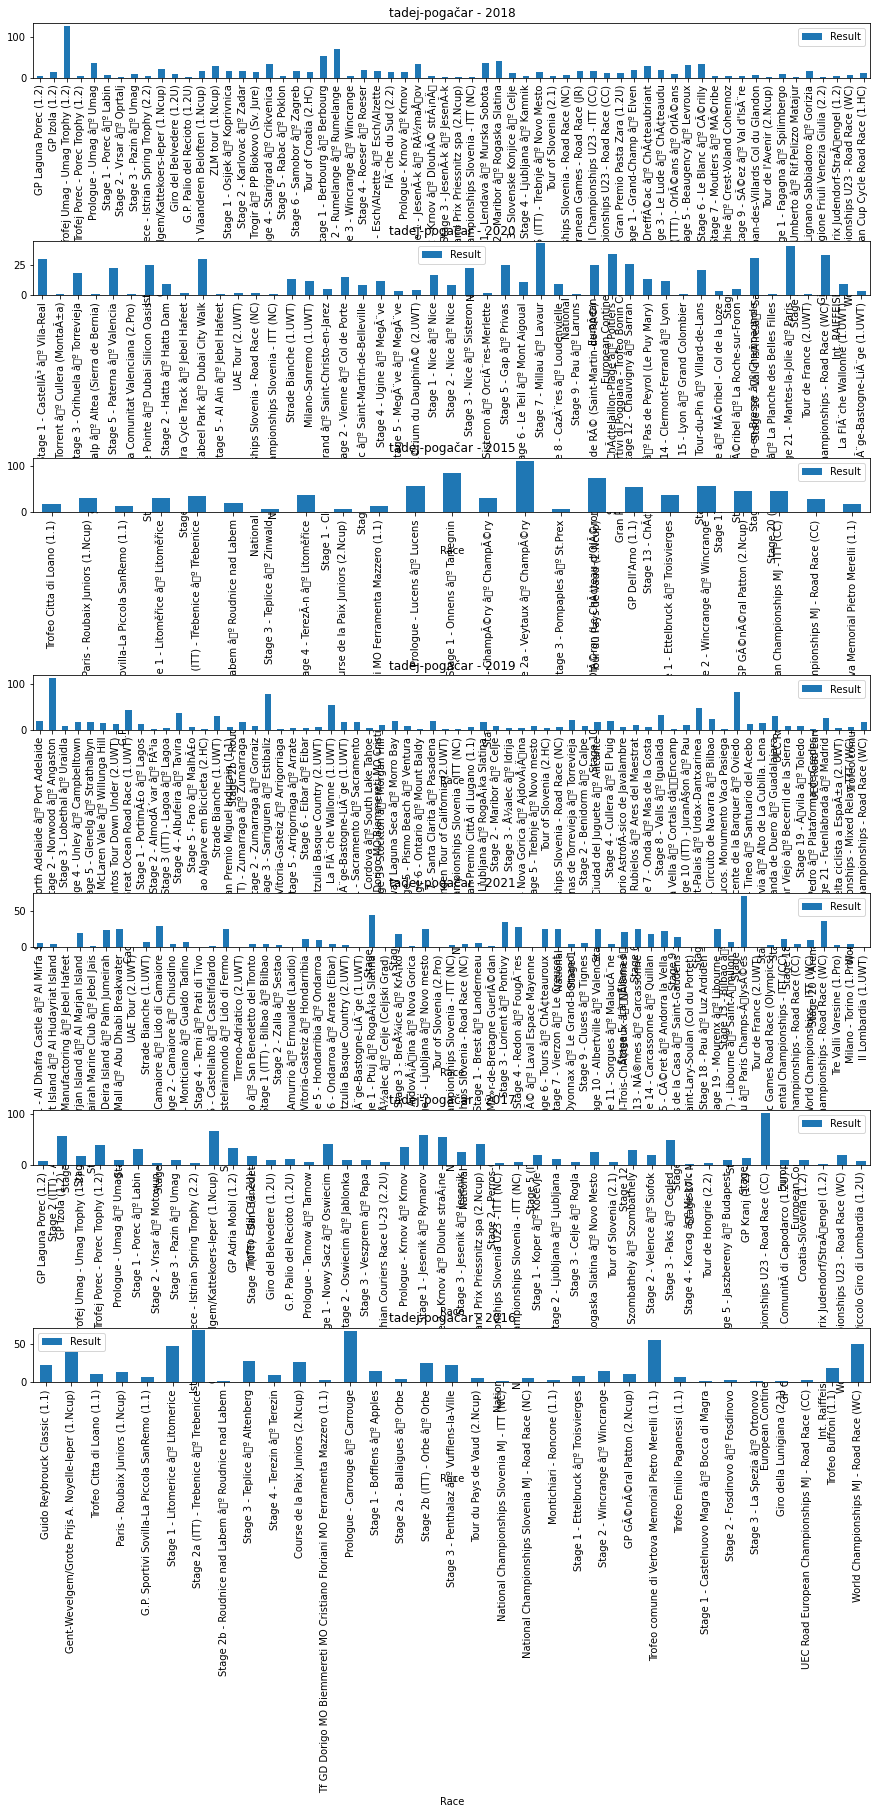

In [9]:
fig, axs = plt.subplots(len(df_rider_clean[rider_name]), figsize=(15,25))

for year, ax in zip(df_rider_clean[rider_name].keys(), axs):
    
    df_rider_clean[rider_name][year].plot(kind='bar', x='Race', y='Result', ax=ax)
    
    ax.set_title(f'{rider_name} - {year}')

#plt.tight_layout()
fig.subplots_adjust(hspace=3)
plt.show()

### Plot Wins, Top5, Top10

In [14]:
rider_top_stats = collections.defaultdict(dict)

for year, df in df_rider_clean[rider_name].items():
    
    rider_top_stats[year]['wins'] = (df['Result'] == 1).sum()
    rider_top_stats[year]['top_five'] = (df['Result'] <= 5).sum()
    rider_top_stats[year]['top_ten'] = (df['Result'] <= 10).sum()

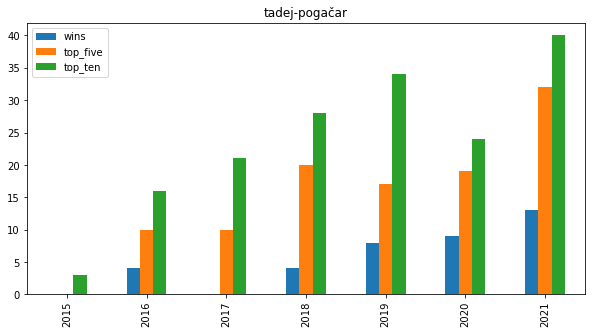

In [15]:
fix, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(rider_top_stats).T.sort_index().plot(kind='bar', ax=ax)

ax.set_title(f'{rider_name}')
plt.show()

In [16]:
pd.DataFrame(rider_top_stats)

,2018,2020,2015,2019,2021,2017,2016
wins,4,9,0,8,13,0,4
top_five,20,19,0,17,32,10,10
top_ten,28,24,3,34,40,21,16


### Plot Results by RaceType

- in what races did the rider perform well ?

In [17]:
year = '2021'

In [18]:
results_by_racetype = pd.DataFrame(df_rider_clean[rider_name][year][['Result', 'SubRaceType']].groupby('SubRaceType')
             , columns=['SubRaceType', 'Result']).set_index('SubRaceType')

results_by_racetype = results_by_racetype['Result'].apply(lambda x: x['Result'])
results_by_racetype

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
SubRaceType,,,,,,,,,,,,,,,,,,,,,
CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.0,5.0,NaN,NaN,NaN,NaN,NaN
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Olympics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN
UWT,6.0,4.0,1.0,20.0,2.0,24.0,25.0,1.0,7.0,29.0,...,72.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
WC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,37.0,NaN,NaN,NaN


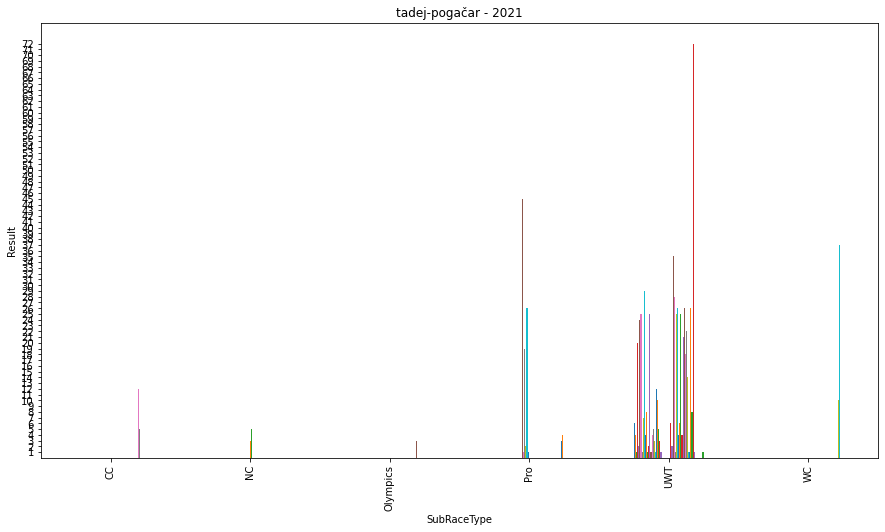

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

results_by_racetype.T.reset_index(drop=True).T.plot(kind='bar', ax=ax)

ax.get_legend().remove()
ax.set_title(f'{rider_name} - {year}')
ax.set_ylabel('Result')
y_max = results_by_racetype.max().max() + 1
ax.set_yticks(np.arange(1, y_max))
plt.show()

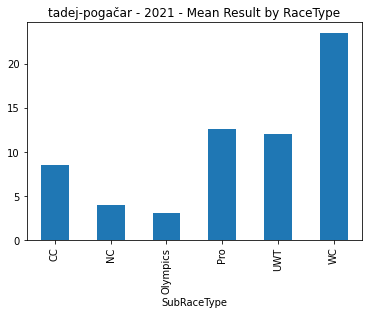

In [22]:
fig, ax = plt.subplots()
results_by_racetype.mean(axis=1).plot(kind='bar', ax=ax)
ax.set_title(f'{rider_name} - {year} - Mean Result by RaceType')
plt.show()

### Plot Wins, Top5, Top10 by RaceType

In [23]:
wins = df_rider_clean[rider_name][year][df_rider_clean[rider_name][year]['Result']==1]
wins.head(5)

,Unnamed: 0,Date,Result,GC,Race,Distance,PointsPCS,PointsUCI,RaceType,SubRaceType,StageRaceName
2,81,2021-02-23,1,1.0,Stage 3 - Strata Manufactoring âº Jebel Hafeet,166.0,35.0,40.0,Stage Race,UWT,UAE Tour (2.UWT)
7,73,2021-02-27,1,NaN,UAE Tour (2.UWT),NaN,NaN,NaN,Stage Race,UWT,UAE Tour (2.UWT)
12,68,2021-03-13,1,1.0,Stage 4 - Terni âº Prati di Tivo,148.0,50.0,60.0,Stage Race,UWT,Tirreno-Adriatico (2.UWT)
15,60,2021-03-16,1,NaN,Tirreno-Adriatico (2.UWT),NaN,NaN,NaN,Stage Race,UWT,Tirreno-Adriatico (2.UWT)
19,57,2021-04-07,1,2.0,Stage 3 - Amurrio âº Ermualde (Laudio),167.7,50.0,50.0,Stage Race,UWT,Itzulia Basque Country (2.UWT)


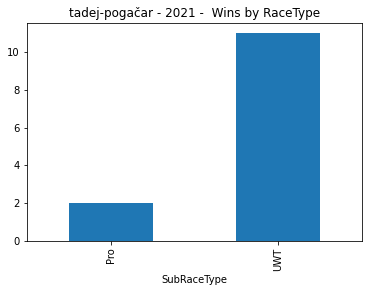

In [24]:
fix, ax = plt.subplots()
wins.groupby('SubRaceType')['Result'].count().plot(kind='bar', ax=ax)
ax.set_title(f'{rider_name} - {year} -  Wins by RaceType')
plt.show()

In [25]:
top_five = df_rider_clean[rider_name][year][df_rider_clean[rider_name][year]['Result']<=5]
top_five.head(5)

,Unnamed: 0,Date,Result,GC,Race,Distance,PointsPCS,PointsUCI,RaceType,SubRaceType,StageRaceName
1,82,2021-02-22,4,1.0,Stage 2 (ITT) - Al Hudayriat Island âº Al Hud...,13.0,9.0,NaN,Stage Race,UWT,UAE Tour (2.UWT)
2,81,2021-02-23,1,1.0,Stage 3 - Strata Manufactoring âº Jebel Hafeet,166.0,35.0,40.0,Stage Race,UWT,UAE Tour (2.UWT)
4,79,2021-02-25,2,1.0,Stage 5 - Fujairah Marine Club âº Jebel Jais,170.0,20.0,15.0,Stage Race,UWT,UAE Tour (2.UWT)
7,73,2021-02-27,1,NaN,UAE Tour (2.UWT),NaN,NaN,NaN,Stage Race,UWT,UAE Tour (2.UWT)
10,70,2021-03-11,4,9.0,Stage 2 - Camaiore âº Chiusdino,202.0,13.0,NaN,Stage Race,UWT,Tirreno-Adriatico (2.UWT)


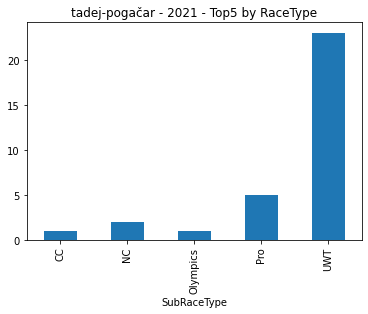

In [26]:
fix, ax = plt.subplots()
top_five.groupby('SubRaceType')['Result'].count().plot(kind='bar', ax=ax)
ax.set_title(f'{rider_name} - {year} - Top5 by RaceType')
plt.show()

In [27]:
top_ten = df_rider_clean[rider_name][year][df_rider_clean[rider_name][year]['Result']<=10]
top_ten.head(5)

,Unnamed: 0,Date,Result,GC,Race,Distance,PointsPCS,PointsUCI,RaceType,SubRaceType,StageRaceName
0,83,2021-02-21,6,5.0,Stage 1 - Al Dhafra Castle âº Al Mirfa,176.0,5.0,NaN,Stage Race,UWT,UAE Tour (2.UWT)
1,82,2021-02-22,4,1.0,Stage 2 (ITT) - Al Hudayriat Island âº Al Hud...,13.0,9.0,NaN,Stage Race,UWT,UAE Tour (2.UWT)
2,81,2021-02-23,1,1.0,Stage 3 - Strata Manufactoring âº Jebel Hafeet,166.0,35.0,40.0,Stage Race,UWT,UAE Tour (2.UWT)
4,79,2021-02-25,2,1.0,Stage 5 - Fujairah Marine Club âº Jebel Jais,170.0,20.0,15.0,Stage Race,UWT,UAE Tour (2.UWT)
7,73,2021-02-27,1,NaN,UAE Tour (2.UWT),NaN,NaN,NaN,Stage Race,UWT,UAE Tour (2.UWT)


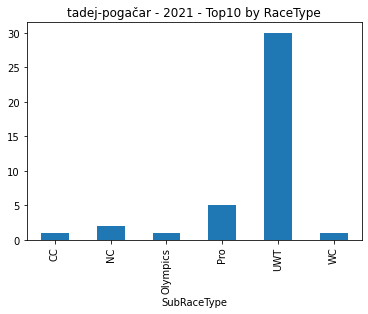

In [28]:
fix, ax = plt.subplots()
top_ten.groupby('SubRaceType')['Result'].count().plot(kind='bar', ax=ax)
ax.set_title(f'{rider_name} - {year} - Top10 by RaceType')
plt.show()

### Plot Racedays

In [29]:
racedays = {}

for year, df in df_rider_clean[rider_name].items():
    
    racedays[year] = len(df)

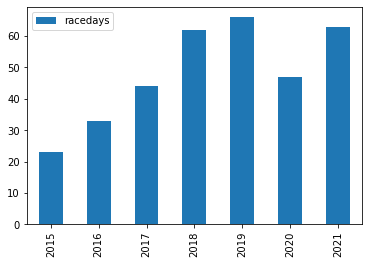

In [30]:
fig, ax = plt.subplots()

pd.DataFrame.from_dict(racedays, columns=['racedays'], orient='index').sort_index().plot(kind='bar', ax=ax)

plt.show()

### Plot Category of Racedays

In [31]:
racedays_subracetype = {}

for year, df in df_rider_clean[rider_name].items():

    racedays_subracetype[year] = df_rider_clean[rider_name][year].groupby('SubRaceType')['Result'].size()
    

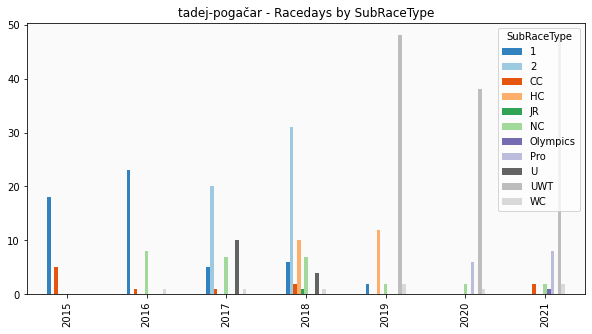

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(racedays_subracetype).T.sort_index().plot(kind='bar', ax=ax, colormap='tab20c')

ax.set_title(f'{rider_name} - Racedays by SubRaceType')
ax.set_facecolor('#FAFAFA')
plt.show()

### Plot GC Stats

- check rm_non_numeric

### Plot One Day Race Classification Results

### Plot Stage Race Classification Results

- progression of top_x over seasons
- stage difficulty index (race ranking scraped on race link, vert. meters)
- model: X (Date, current GC, dist, vert, uci points, racetype, subracetype, racename, weather?), y (Result)
- strategy for teams to win points and stay/progress to world tour ?
- get 'won how' data and define strategy based on stage ?
- when this info is missing, impute sprint if same arrival time, solo if time gaps, etc.
- junior/u23 rider potential: clustering of results compared to successful riders
- world tour teams performance analysis -> race selection optimization